# Lab 9: Implementing Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = dataset.iloc[:,[3,4]].values

In [6]:
print(X[0:5,:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


### Using the dendrogram to find the optimal number of clusters

Text(0, 0.5, 'Euclidian Distance')

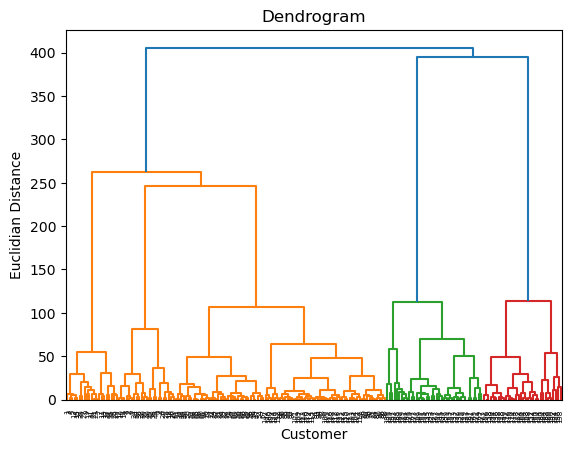

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidian Distance")

In [8]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3

In [9]:
unique_colors = set(dendrogram['color_list'])
print(unique_colors)

{'C3', 'C0', 'C2', 'C1'}


In [10]:
print("Optimal Number of Clusters :",len(unique_colors)-1)

Optimal Number of Clusters : 3


## Training the Hierarchical Clustering model on the dataset

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering (n_clusters = 5, 
                              affinity = 'euclidean', 
                              linkage = 'ward')
y_hc = hc.fit_predict(X)

In [12]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [13]:
# Get the cluster leaves
leaves = hc.children_

print("Cluster Leaves :")
for i in leaves:
    print(i,"  ",end="")
    
print("\n\nTotal number of Cluster Leaves is",len(leaves))

Cluster Leaves :
[65 68]   [48 49]   [156 158]   [129 131]   [21 23]   [51 53]   [60 61]   [67 69]   [64 66]   [79 82]   [74 85]   [78 80]   [75 81]   [92 97]   [101 109]   [107 113]   [94 98]   [103 104]   [100 105]   [150 154]   [119 120]   [170 174]   [151 155]   [ 63 200]   [ 99 213]   [3 5]   [26 28]   [40 42]   [10 14]   [54 57]   [58 62]   [70 73]   [91 93]   [108 112]   [126 132]   [137 139]   [147 159]   [ 77 210]   [ 76 212]   [149 222]   [ 12 228]   [116 233]   [13 15]   [2 6]   [87 90]   [106 110]   [114 115]   [128 130]   [134 136]   [148 152]   [153 157]   [165 171]   [111 217]   [0 4]   [50 52]   [86 88]   [89 96]   [146 160]   [216 218]   [164 168]   [181 183]   [187 191]   [186 190]   [176 221]   [133 235]   [208 230]   [140 248]   [125 203]   [38 44]   [ 83 209]   [ 59 207]   [122 220]   [16 20]   [30 32]   [118 121]   [102 117]   [34 36]   [214 215]   [135 143]   [167 173]   [ 95 224]   [138 247]   [232 258]   [37 39]   [ 55 201]   [ 84 238]   [ 46 254]   [43 45]   [

In [14]:
from sklearn.metrics import adjusted_rand_score

true_labels = X[:, 1]

# Compute the Rand score
rand_score = adjusted_rand_score(true_labels, y_hc)

print("Rand Score is :",rand_score)

Rand Score is : 0.04691528687852573


In [15]:
# Get the number of connected components in the graph
connected_components = hc.n_connected_components_

print("Number of connected components in the graph is ",connected_components)

Number of connected components in the graph is  1


In [16]:
# Get the number of features seen during fit
num_features = hc.n_features_in_

print("Number of features seen during fit", num_features)

Number of features seen during fit 2


## Visualising the clusters

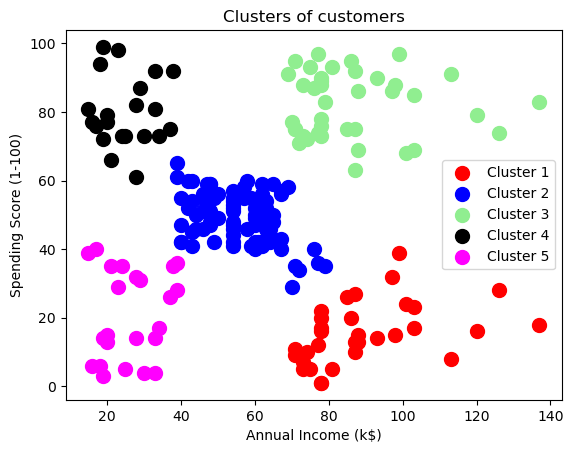

In [17]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# New Model 

Linkage = Single 

Metric =cosine 


Text(0, 0.5, 'Euclidian Distance')

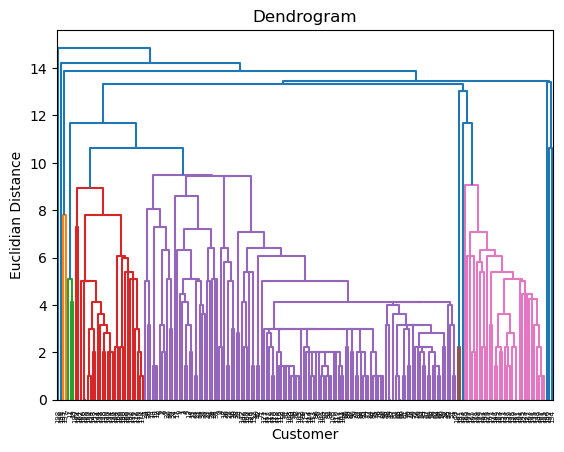

In [18]:
import scipy.cluster.hierarchy as sch
dendrogram1 = sch.dendrogram(sch.linkage(X,method = 'single'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidian Distance")

In [19]:
print(dendrogram1['color_list'])

['C1', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C0', 'C0', 'C5', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6

In [20]:
unique_colors2 = set(dendrogram1['color_list'])
print(unique_colors2)

{'C4', 'C3', 'C6', 'C5', 'C0', 'C2', 'C1'}


In [21]:
print("Optimal Number of Clusters :",len(unique_colors2)-1)

Optimal Number of Clusters : 6


In [22]:
from sklearn.cluster import AgglomerativeClustering

hc2 = AgglomerativeClustering (n_clusters = 5,affinity ='cosine',linkage = 'single',)
y_hc2 = hc2.fit_predict(X)

In [23]:
print(y_hc2)

[4 2 0 2 4 2 0 2 0 2 1 2 1 2 1 2 1 4 1 2 1 4 0 4 0 4 1 4 1 4 0 4 0 4 0 4 0
 4 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 3 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [24]:
# Get the cluster leaves
leaves2 = hc2.children_

print("Cluster Leaves :")
for i in leaves2:
    print(i,"  ",end="")
    
print("\n\nTotal number of Cluster Leaves is",len(leaves2))

Cluster Leaves :
[16 45]   [65 68]   [129 131]   [48 49]   [59 67]   [ 75 204]   [137 205]   [157 206]   [ 71 111]   [24 36]   [156 158]   [ 30 194]   [110 189]   [ 72 185]   [100 116]   [52 63]   [103 181]   [161 203]   [ 69 213]   [ 89 106]   [ 84 202]   [ 7 11]   [ 18 145]   [ 96 177]   [81 86]   [54 57]   [ 44 113]   [173 220]   [ 85 119]   [139 153]   [ 50 141]   [ 76 218]   [ 62 167]   [ 26 155]   [143 233]   [128 144]   [23 25]   [175 231]   [ 55 102]   [ 78 147]   [ 77 216]   [ 87 239]   [190 196]   [ 58 232]   [ 10 114]   [70 73]   [170 178]   [40 42]   [83 92]   [ 99 193]   [112 195]   [179 241]   [ 97 120]   [163 234]   [229 237]   [215 222]   [174 246]   [217 225]   [ 82 109]   [138 211]   [31 41]   [38 94]   [ 66 257]   [134 140]   [182 235]   [198 259]   [ 90 159]   [  8 264]   [ 56 253]   [214 250]   [125 243]   [74 95]   [ 93 191]   [ 79 101]   [192 263]   [187 272]   [227 262]   [133 254]   [ 64 276]   [165 240]   [149 268]   [104 117]   [256 267]   [151 245]   [171 27

In [25]:
from sklearn.metrics import adjusted_rand_score

true_labels2 = X[:, 1]

# Compute the Rand score
rand_score2 = adjusted_rand_score(true_labels2, y_hc2)

print("Rand Score is :",rand_score2)

Rand Score is : 0.016360406630458152


In [26]:
# Get the number of connected components in the graph
connected_components2 = hc2.n_connected_components_

print("Number of connected components in the graph is ",connected_components2)

Number of connected components in the graph is  1


In [27]:
# Get the number of features seen during fit
num_features2 = hc.n_features_in_

print("Number of features seen during fit", num_features2)

Number of features seen during fit 2
